# ***PROBLEM STATEMENT***

* Problem Statement
In the following, we will use a dataset from Kaggle that contains the mushroom  data. It has a column at the beginning that contains if the mushroom is eatable or poisonous. My goal is to see if I can predict if the mushroom is eatable or not using the other columns in the table.

# ***Strategy:***

* To implement logistic regression,

>1) implement the hypothesis.(passing the value linear regression(z) through the sigmoid function)

> 2)Then,calculate the cost function.


> 3) Make a function for gradient descent.

> 4)Finally,get the accurecy for the model.



#***Loading the data set***

In [1]:
#To load the data set.
import pandas as pd
msrm=pd.read_csv('/content/mushrooms.csv')

In [2]:
msrm.head() # showing first 5 training examples of the data frame 'msrm'

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
msrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**GREAT!!!...There does not exist even a single Null-value even in a single column. BUT,all the data points are in object type.I have to implement Label-encoding for each column.**

##***Label Encoding***##

In [ ]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
l_encd = preprocessing.LabelEncoder() 
  


In [ ]:
col=msrm.columns # Creating a list of each column-name and storing in 'col'

for i in col:
  msrm[i]=l_encd.fit_transform(msrm[i])  #".fit_transform" label encoding each features column-wise

**For label-encoding**:we first created a list of the columns in ***'col'***

In [ ]:

msrm.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1


See, Now all the data point are being labelled by numbers through Label-Encoding

In [ ]:
msrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

All the data types are 'int64'

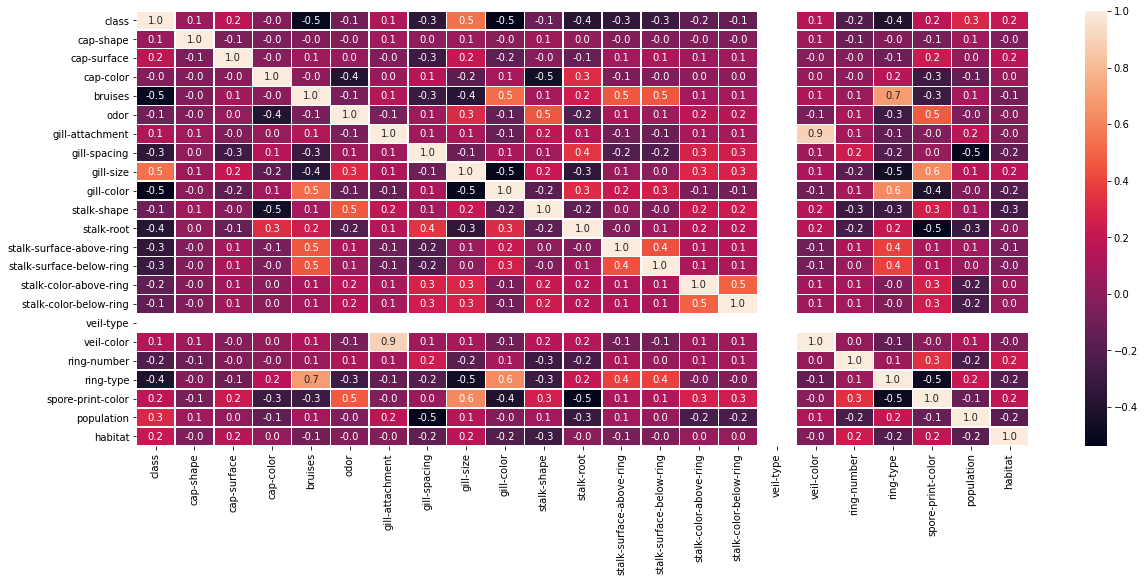

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(20,8)) #Add a subplot to the current figure.
sns.heatmap(msrm.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) #'.corr()' is to represent the 2-D data points.

From the heat-map,it is clear that there exists **Multi-colinearity** between some features(viz. the correlation between 'gill-attachment' and 'veil-color' is about 0.9!!).The disadvantage of the **Multi-colinearity**,it makes the model over fitting.

To **overcome** this ambiguity,we will creat a new features out of these colineared features and observe the depenceny on the target features for the new obtained features..

# ***Developing the hypothesis***

In [ ]:
import numpy as np

In [ ]:
def hypothesis(x, theta):
    z = np.dot(x,theta)
    return  1/(1+np.exp(-(z))) - 0.0000001

I deducted 0.0000001 from the output here because of this expression in the cost function:(1-h_i)

If the outcome of the hypothesis expression comes out to be 1, then this expression will turn out to be the log of zero. To mitigate that, I used this very small number at the end.

# ***Determining the cost function***

>Cost function for Logistic Regression:$\sum_{i=1}^m [ y\times ln(y_i') )+ (1-y)
\times ln(1-y_i')]$ of loss function.
* m=number of columns.

* Loss Function for logistic Regression is given as $L= y\times ln(y') + (1-y)
\times ln(1-y')$
* y'=value of the sigmoid function

In [ ]:
def cost(x,y,theta):


  y1 = hypothesis(x,theta)
  return -(1/len(x))*np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

# ***To implement the gradient descent***

In [ ]:

def grad(x,y,theta,alpha,epochs): # x=>data frame,theta=>parameters,alpha=>learning rate.
   m=len(x)
   j=[cost(x,y,theta)]
   for i in range(0,epochs):
     h=hypothesis(x,theta) #building the equation.
     for i in range(0,len(x.columns)):
       theta[i]-=(alpha/m)*np.sum((h-y)*x.iloc[:,i])# to make update
     j.append(cost(x,y,theta))
   return j,theta
    # j contains the cost function values and theta contains the last updated parameters
    

# ***To Get The Prdiction***

In [ ]:
def predict(x, y, theta, alpha, epochs):
    J, th = grad(x, y, theta, alpha, epochs) 
    h = hypothesis(x, theta)
    # fit x with last updated theta values and storing the corresponding values are being stored in h.
    #number of h=number of examples. 
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc
    #j=>the value of cost functions
    #'acc'=>accurecy

In [ ]:
msrm.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
x=msrm.drop(['class'],axis=1) # input features of my data set
y=msrm['class']
theta=np.random.normal(size=22)

In [ ]:
print('The shape of the input training data set: ',x.shape)
print('The shape of the output feature: ',y.shape)

The shape of the input training data set:  (8124, 22)
The shape of the output feature:  (8124,)


In [ ]:
cost,accurecy=predict(x,y,theta,0.1,11500) 




1.   So,the weights($\theta_i$s) are being assigned as per the normal distribution.
>[theta=np.random.normal(size=22)],
    * 'size=22'=>creating 22 random numbers according to normal distribution.   


2.   Step-size(i.e. learning rate)=0.1

3.   Number of epochs(i.e the number of times the cost function is being updated =11500)



In [ ]:
accurecy

0.9523633677991138

# ***Visualising the cost function against Epoch***

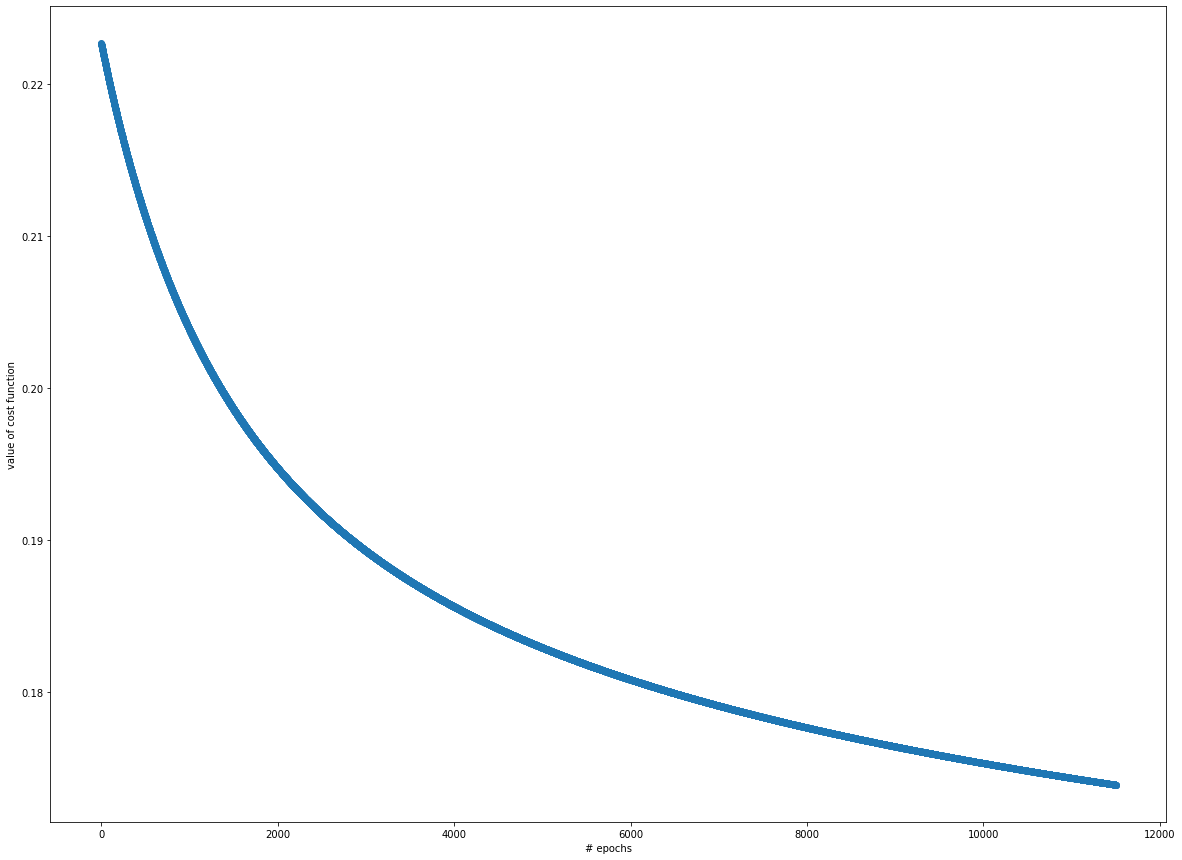

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 15))
plt.scatter(range(0, len(cost)), cost)
plt.xlabel('# epochs')
plt.ylabel('value of cost function')


plt.show()

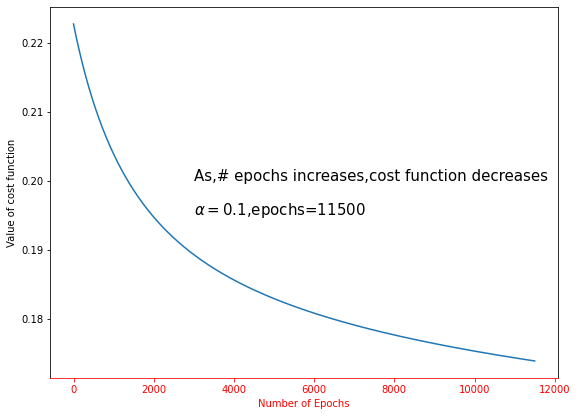

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 15))
# plt.figure(figsize = (20, 15))

ax = fig.add_subplot(221)

ax.plot(range(0, len(cost)), cost)
ax.set_xlabel('Number of Epochs')
ax.set_ylabel('Value of cost function')

ax.spines['bottom'].set_color('red')

ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.text(3000,0.2,r'As,# epochs increases,cost function decreases', fontsize=15)
ax.text(3000,0.195,r'$\alpha=0.1$,epochs=11500', fontsize=15)

plt.show()

In [ ]:
print('Accurecy for this model with alpha=0.1 and # epoch=11500: ',accurecy*100)

Accurecy for this model with alpha=0.1 and # epoch=11500:  95.23633677991138


# ***Conclusion***

* I have implemented the logistic regression from scratch.
* I have used learning rate, $\alpha=0.1$ and the number of epochs=11500.
* Further Motivation: one can show that there exist a local minima in the cost function,it may be visible for # epochs~100.

***The acurecy of my model=95.2363%.***